In [26]:
import numpy as np
from scipy.stats import mode
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We convert "Sex" and "Embarked" into numeric variables using one hot encoding:

In [14]:
# Sexmale is 1 if passenger is male, 0 if female
data['Sexmale'] = np.int32(data['Sex'] == 'male')
data['Sexfemale'] = np.int32(data['Sex'] == 'female') 
data['EmbarkedS'] = np.int32(data['Embarked'] == 'S')
data['EmbarkedC'] = np.int32(data['Embarked'] == 'C')
data['EmbarkedQ'] = np.int32(data['Embarked'] == 'Q')

There are some values we must discard before running any algorithm.  
The "Cabin" feature contains missing values, and is the only column with missing values, so we delete it.
The "PassengerID" field is simply each entry's index, and should not influence whether or not a passenger survived.
The "Name" and "Ticket" fields are string fields that are not amenable to conversion to numbers.  
Finally, we drop any row with missing values.

In [17]:
# drop unwanted columns
temp = data[['Pclass','Sexmale','Sexfemale','Age','SibSp','Parch','Fare','EmbarkedS','EmbarkedC','EmbarkedQ','Survived']]
temp.shape

(891, 11)

In [19]:
# drop rows with missing values
temp = temp.dropna(axis='rows')
X = temp[['Pclass','Sexmale','Sexfemale','Age','SibSp','Parch','Fare','EmbarkedS','EmbarkedC','EmbarkedQ']]
y = temp['Survived']
print(X.shape)
print(y.shape)

(714, 10)
(714,)


We need to check the appropriateness of using raw accuracy as a measure of how good the model is.
We check the accuracy of always predicting the modal value for "Survived".

In [20]:
print(mode(y,keepdims=False))

ModeResult(mode=0, count=424)


In [21]:
# mode is 0
ymode = np.zeros(y.size)
# get accuracy
np.sum(ymode != y) / y.size

0.4061624649859944

We can get an error of 0.406 by just predicting the most common value.  
At minimum, we want our model to beat this value.

We first need a value for the regularization parameter.
We compare different values 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

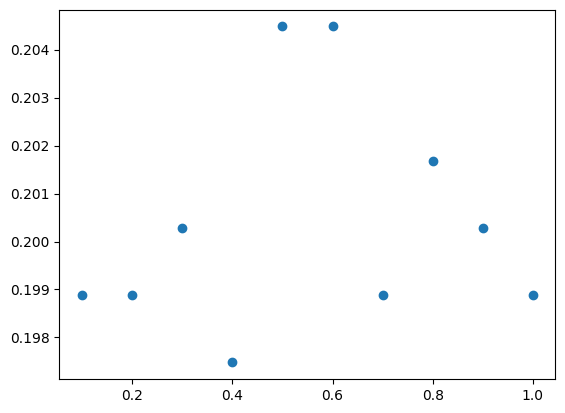

In [28]:
n,d = X.shape
no_alphas = 10
alphas = np.arange(1,no_alphas+1) * 0.1
errors = np.ones(no_alphas)
for i in range(no_alphas):
    alpha = alphas[i]
    model = LogisticRegression(C=1/alpha).fit(X,y)
    y_pred = model.predict(X)
    errors[i] = np.sum(y_pred != y) / y.size

plt.scatter(alphas,errors)
plt.show()

In [18]:
n,d = X.shape
folds = 5
splits = np.int32(np.arange(folds) * (n / folds))
splits = np.append(splits,n)
errors = np.ones(folds)

# iterate through folds
for i in range(folds):
    # use a mask to identify which to use
    mask = np.zeros(n, dtype=bool)
    mask[splits[i]:splits[i+1]] = True # True = validation
    train = X[~mask]
    test = X[mask]
    # train the model
    

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

Use https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html